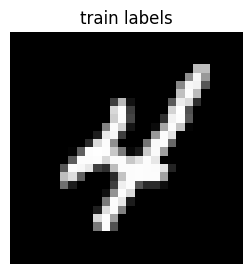

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 70)             │         8,470 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,300 (743.36 KB)

 Trainable params: 190,300 (743.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 200s 3ms/step - accuracy: 0.8791 - loss: 0.3825 - val_accuracy: 0.9581 - val_loss: 0.1380
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 192s 3ms/step - accuracy: 0.9657 - loss: 0.1127 - val_accuracy: 0.9696 - val_loss: 0.1029
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 245s 4ms/step - accuracy: 0.9759 - loss: 0.0767 - val_accuracy: 0.9741 - val_loss: 0.0999
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 232s 3ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9650 - val_loss: 0.1282
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - accuracy: 0.9855 - loss: 0.0466 - val_accuracy: 0.9733 - val_loss: 0.0957
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - accuracy: 0.9879 - loss: 0.0380 - val_accuracy: 0.9767 - val_loss: 0.0927
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 201s 3ms/step - accuracy: 0.9893 - loss: 0.0318 - val_accuracy: 0.9759 - val_loss: 0.0934
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 199s 3ms/step - ac

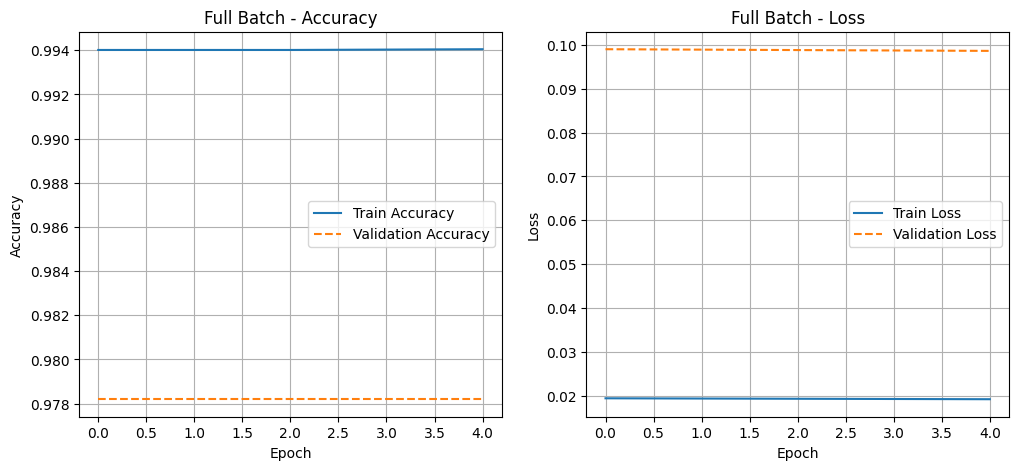

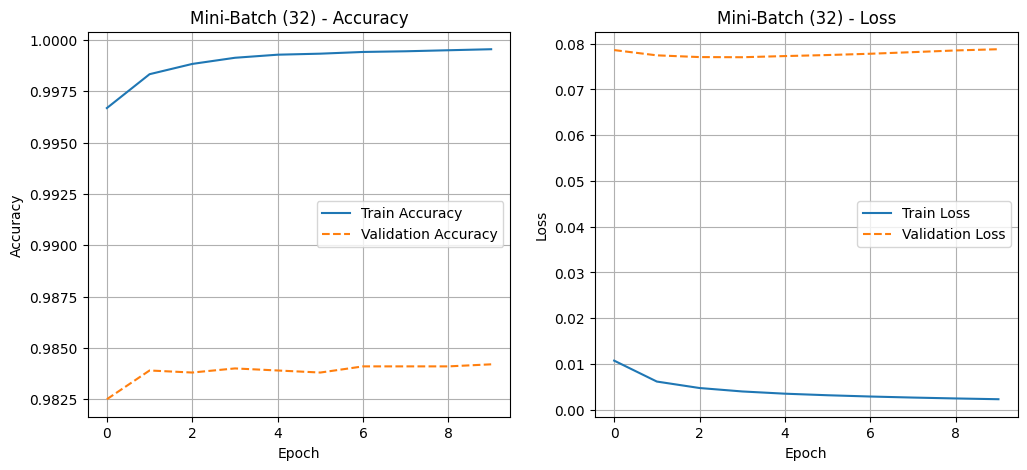

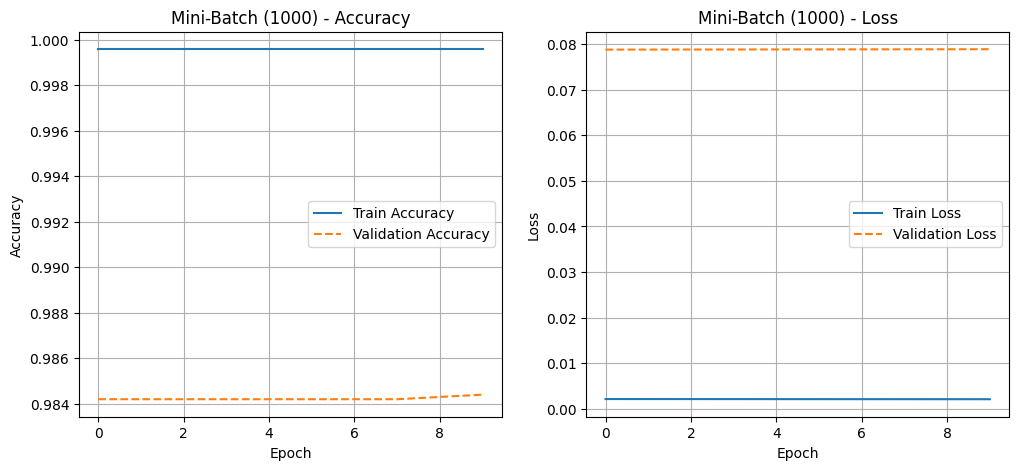

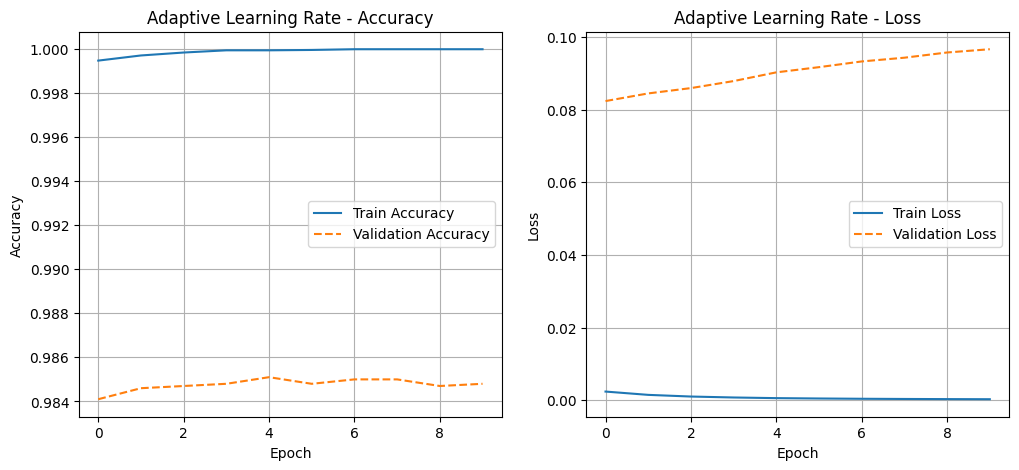

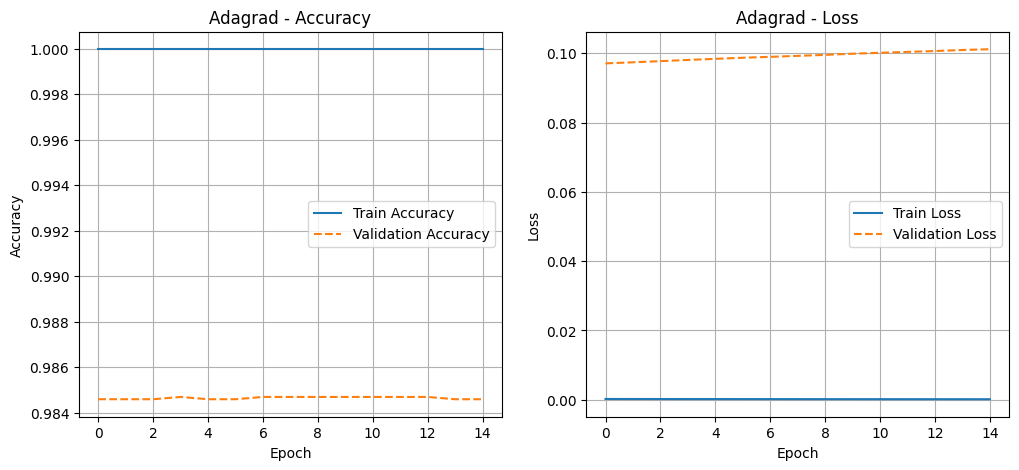

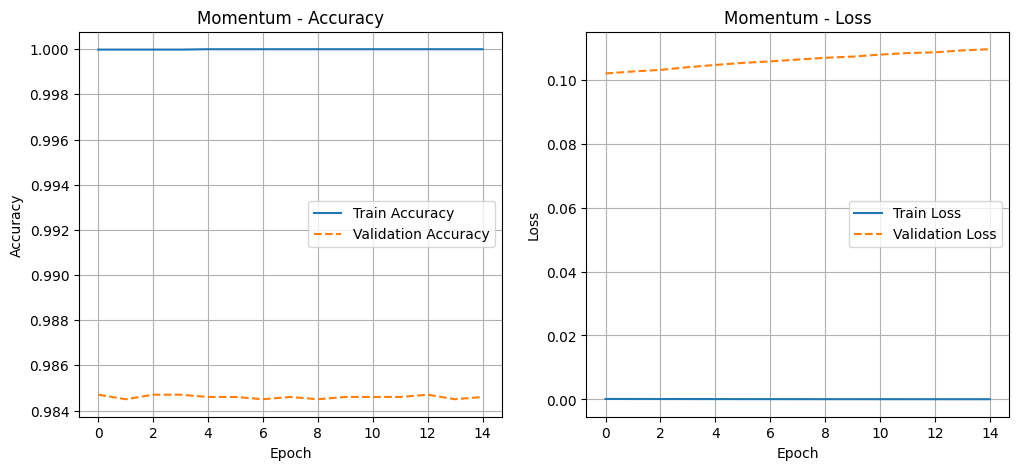

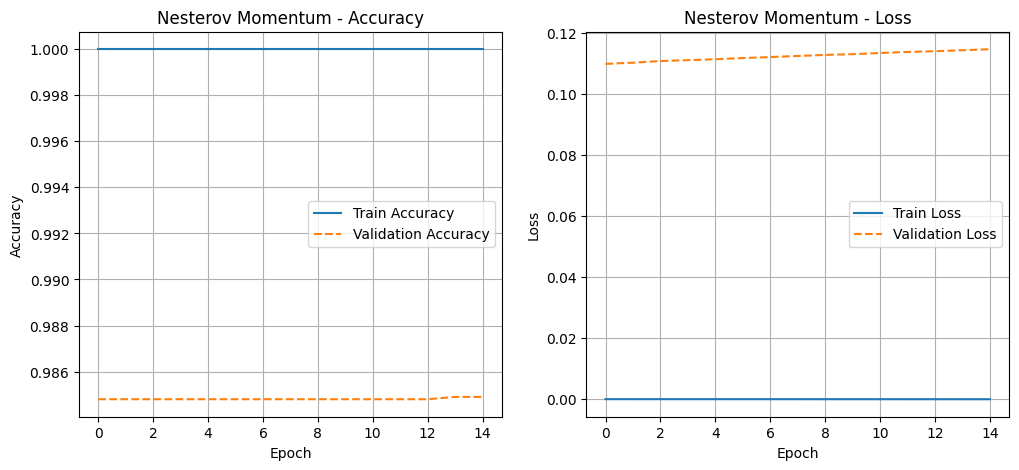

In [2]:

#importing the necessary libraries
from tensorflow.keras import optimizers,models,layers
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as p
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

mnist.load_data()

# Normalizing the data
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images , test_images = train_images /255 , test_images / 255

# X trainig data
train_images.shape

# y label data
train_labels.shape

# X test data
test_images.shape

# y test label
test_labels.shape

# plotting the images 
plt.figure(figsize=(3,5))
plt.imshow(train_images[9],cmap='gray')
plt.title('train labels')
plt.axis('off')
plt.show()

train_images_flat = train_images.reshape((train_images.shape[0],784))
print(train_images_flat)

test_images_flat = test_images.reshape((test_images.shape[0],784))
print(test_images_flat)

# Building the Model
def mohsin_model():
    mohsin_nn = tf.keras.Sequential([
        tf.keras.layers.Dense(200, activation='relu', input_shape=(28 * 28,)),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(70, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    mohsin_nn.summary()
    return mohsin_nn

mohsin_nn = mohsin_model()

fix_lr = 0.01
optimizer = optimizers.SGD(learning_rate = 0.01)

# Compiling and training the model
mohsin_nn.compile(optimizer = optimizer, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = mohsin_nn.fit(train_images_flat, train_labels, batch_size=1, epochs=10, validation_data=(test_images_flat, test_labels), verbose=1 , shuffle= True)
end_time = time.time()

print(f"SGD training time: {end_time - start_time:.2f} seconds")

# Full Batch Gradient Descent
full_batch = tf.keras.optimizers.SGD(learning_rate=0.01)
mohsin_nn.compile(optimizer=full_batch, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_full_batch = mohsin_nn.fit(train_images_flat, train_labels, batch_size=len(train_images_flat), epochs=5, validation_data=(test_images_flat, test_labels), verbose=1, shuffle=True)
end_time = time.time()
print(f"Full Batch Gradient Descent training time: {end_time - start_time:.2f} seconds")

# Mini-Batch Gradient Descent with Fixed Learning Rate (Batch Size = 32)
mini_batch = tf.keras.optimizers.SGD(learning_rate=0.01)
mohsin_nn.compile(optimizer=mini_batch, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_mini_batch = mohsin_nn.fit(train_images_flat, train_labels, batch_size=32, epochs=10, validation_data=(test_images_flat, test_labels), verbose=1, shuffle=True)
end_time = time.time()
print(f"Mini-Batch Gradient Descent (Batch Size = 32) training time: {end_time - start_time:.2f} seconds")

# Mini-Batch Gradient Descent with Fixed Learning Rate (Batch Size = 1000)
mini_batch1 = tf.keras.optimizers.SGD(learning_rate=0.01)
mohsin_nn.compile(optimizer=mini_batch1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_mini_batch1 = mohsin_nn.fit(train_images_flat, train_labels, batch_size=1000, epochs=10, validation_data=(test_images_flat, test_labels), verbose=1, shuffle=True)
end_time = time.time()
print(f"Mini-Batch Gradient Descent (Batch Size = 1000) training time: {end_time - start_time:.2f} seconds")

# Mini-Batch Gradient Descent with Adaptive Global Learning Rate
init_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(init_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True)
adaptive = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
mohsin_nn.compile(optimizer=adaptive, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_adaptive = mohsin_nn.fit(train_images_flat, train_labels, batch_size=32, epochs=10, validation_data=(test_images_flat, test_labels), verbose=1, shuffle=True)
end_time = time.time()
print(f"Mini-Batch with Adaptive Learning Rate training time: {end_time - start_time:.2f} seconds")

# Mini-Batch Gradient Descent with Adagrad
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
mohsin_nn.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_adagrad = mohsin_nn.fit(train_images_flat, train_labels, batch_size=32, epochs=15, validation_data=(test_images_flat, test_labels), verbose=1, shuffle=True)
end_time = time.time()
print(f"Mini-Batch with Adagrad training time: {end_time - start_time:.2f} seconds")

# Mini-Batch Gradient Descent with Momentum
momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
mohsin_nn.compile(optimizer=momentum, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_momentum = mohsin_nn.fit(train_images_flat, train_labels, batch_size=32, epochs=15, validation_data=(test_images_flat, test_labels), verbose=1, shuffle=True)
end_time = time.time()
print(f"Mini-Batch with Momentum training time: {end_time - start_time:.2f} seconds")

# Mini-Batch Gradient Descent with Nesterov Momentum
nesterov = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mohsin_nn.compile(optimizer=nesterov, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_nesterov = mohsin_nn.fit(train_images_flat, train_labels, batch_size=32, epochs=15, validation_data=(test_images_flat, test_labels), verbose=1, shuffle=True)
end_time = time.time()
print(f"Mini-Batch with Nesterov Momentum training time: {end_time - start_time:.2f} seconds")

def plot_individual_results(histories, titles):
    for i, title in enumerate(titles):
        plt.figure(figsize=(12, 5))

        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(histories[i].history['accuracy'], label='Train Accuracy')
        if 'val_accuracy' in histories[i].history:
            plt.plot(histories[i].history['val_accuracy'], label='Validation Accuracy', linestyle='--')
        plt.title(f'{title} - Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        plt.grid()

        # Plot the loss
        plt.subplot(1, 2, 2)
        plt.plot(histories[i].history['loss'], label='Train Loss')
        if 'val_loss' in histories[i].history:
            plt.plot(histories[i].history['val_loss'], label='Validation Loss', linestyle='--')
        plt.title(f'{title} - Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.grid()

histories = [
    history_full_batch,
    history_mini_batch,
    history_mini_batch1,
    history_adaptive,
    history_adagrad,
    history_momentum,
    history_nesterov
]

titles = [
    'Full Batch',
    'Mini-Batch (32)',
    'Mini-Batch (1000)',
    'Adaptive Learning Rate',
    'Adagrad',
    'Momentum',
    'Nesterov Momentum'
]


plot_individual_results(histories, titles)

### Summary of Optimization Techniques for Training Neural Networks

This script evaluates different optimization strategies for training a neural network on the MNIST dataset.

**Data Preprocessing**
- MNIST images are normalized and reshaped for input into a neural network, improving convergence speed.

**Model Architecture**
- The model has three hidden layers (200, 120, 70 neurons) with ReLU activation, and an output layer with softmax for multi-class classification.

**Optimization Techniques**
- **SGD**: Uses a fixed learning rate (0.01) and offers a baseline for comparison.
- **Full Batch**: Uses the entire dataset for updates, providing stability but slower convergence.
- **Mini-Batch**: Tests batch sizes 32 and 1000; smaller batches add noise but can speed up convergence.
- **Adaptive Learning Rate**: Adjusts over time, offering fine-tuned learning as training progresses.
- **Adagrad**: Adapts learning rates per parameter, effective for sparse data but may decay learning rate too quickly.
- **Momentum & Nesterov**: These methods speed up convergence by incorporating past gradient updates.

**Correction Needed**
- Fix the naming issue in the `mohsin_model` function, ensuring consistency in the variable name `mohsin_nn`.

**Insights**
- Mini-Batch methods balance speed and stability, with 32 as a common choice.
- Adaptive learning methods help adjust learning rates dynamically.
- Momentum techniques accelerate convergence, particularly useful in later training stages.